In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_Rattings.csv')
df.head()

,Unnamed: 0,Number of Stars,Full Review,title
0,0,5.0,Very nice product this watch is amazing I'm ve...,boAt Storm Smartwatch Reviews
1,1,4.0,If there was an award for the worst smartwatch...,boAt Storm Smartwatch Reviews
2,2,4.0,Go for it.\nI don't believe in any reviews unt...,boAt Storm Smartwatch Reviews
3,3,5.0,"After use for one month I write this review, b...",boAt Storm Smartwatch Reviews
4,4,5.0,Excellent product very nice watch better than ...,boAt Storm Smartwatch Reviews


In [3]:
df= pd.read_csv('data_Rattings.csv', usecols = ['Number of Stars','Full Review'] )

In [4]:
df.head()

,Number of Stars,Full Review
0,5.0,Very nice product this watch is amazing I'm ve...
1,4.0,If there was an award for the worst smartwatch...
2,4.0,Go for it.\nI don't believe in any reviews unt...
3,5.0,"After use for one month I write this review, b..."
4,5.0,Excellent product very nice watch better than ...


Each review is stored as string in the reviewText series

In [5]:
print(df["Full Review"].iloc[0])

Very nice product this watch is amazing I'm very happy to buy this smart watch


In [6]:
df.isnull().sum()

Number of Stars    1171
Full Review           0
dtype: int64

In [7]:
df.describe()

,Number of Stars
count,16019.000000
mean,4.593982
std,0.691315
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Data Preprocessing

One important data cleaning process is to get rid of null values. Let’s check how many null values we have in the dataset.

In [8]:
len(df) - len(df.dropna())

1171

In [9]:
len(df)

17190

We have a total of 171900 data. So, if we delete all the null values, we will still have a sizable data to train an algorithm. So, let’s drop the null values.

In [10]:
df = df.dropna()

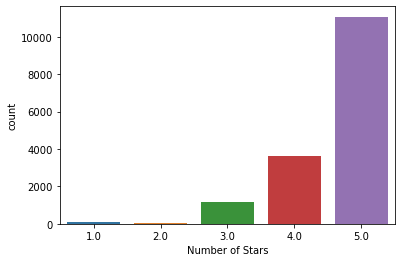

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.countplot(df ["Number of Stars"])
plt.show()

Now, we will check the datatype of the review data of every row. If there is any row having data in any other type than string we will change that to a string.

In [12]:
for i in range(0,len(df)-1):
    if type(df.iloc[i]['Full Review']) != str:
        df.iloc[i]['Full Review'] = str(df.iloc[i]['Full Review'])

In our rating column, we have ratings from 1 to 5. We can define 1 and 2 as bad reviews and 4 and 5 as good reviews.

We will denote positive rating as 1 and negative retting as 0. Let’s write a function ‘sentiment’ that returns 1 if the rating is 4 or more else return 0. Then, apply the function sentiment and create a new column that will represent the positive and negative as 1 or 0

In [13]:
def sentiment(n):
    return '1' if n >= 3 else '0'
df['sentiment'] = df['Number of Stars'].apply(sentiment)
df.head()

,Number of Stars,Full Review,sentiment
0,5.0,Very nice product this watch is amazing I'm ve...,1
1,4.0,If there was an award for the worst smartwatch...,1
2,4.0,Go for it.\nI don't believe in any reviews unt...,1
3,5.0,"After use for one month I write this review, b...",1
4,5.0,Excellent product very nice watch better than ...,1


Look, we have the ‘sentiment’ column added at the end now!
First, we need to prepare the training features. Combine both ‘name’ and ‘review’ columns and make one single column. First, write a function ‘combined_features’ that will combine both the columns. Then, apply the function and create a new column ‘all_features’ that will contain the strings from both title and Full Review columns.

# NLP Pre-Processing

In [14]:

    
    df['Full Review'] = df['Full Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

     #Replace url addresses with 'webaddress
    df['Full Review'] =df['Full Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


    #Replace money symbol  with 'monysymbl('')
    df['Full Review'] = df['Full Review'].str.replace(r'$','dollers')


    #Replace email address
    df['Full Review'] = df['Full Review']. str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[-s]?[\d]{4}$','phonenumber')

    #Replace number  with 'numbr'
    df['Full Review'] = df['Full Review']. str.replace(r'\d+(\.\d+)?', 'numbr')
     


   

# Regular Expression

In [15]:
# Replace email addresses with 'email'

df['Full Review'] = df['Full Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#Replace url addresses with 'webaddress
df['Full Review'] = df['Full Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#Replace money symbol  with 'monysymbl('')
df['Full Review'] = df['Full Review'].str.replace(r'$','dollers')

#Replace email address
df['Full Review'] = df['Full Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[-s]?[\d]{4}$','phonenumber')

#Replace number  with 'numbr'
df['Full Review'] = df['Full Review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [16]:
#    
#Remove punctuation'
df['Full Review'] = df['Full Review'].str.replace(r'[^\w\d\s]','')


#Replace whitespace between terms with a single space'
df['Full Review'] = df['Full Review'].str.replace(r'\s+','')

#Remove leading and trailing whitespace'
df['Full Review'] = df['Full Review'].str.replace(r'^\s+|\s+?$','')

In [17]:
df.rename(columns={'Number of Stars': 'Stars'}, inplace=True)

df.rename(columns={'Full Review':'Review'}, inplace= True)


In [18]:
#df["Length"]= df.Review.str.len()

In [19]:
df.head()

,Stars,Review,sentiment
0,5.0,VeryniceproductthiswatchisamazingImveryhappyto...,1
1,4.0,Iftherewasanawardfortheworstsmartwatchinthemar...,1
2,4.0,GoforitIdontbelieveinanyreviewsuntillIuseitany...,1
3,5.0,AfteruseforonemonthIwritethisreviewbatteryback...,1
4,5.0,Excellentproductverynicewatchbetterthanrealmea...,1


In [20]:
#remove stopwords

import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')+['u','u','ur','4','2','im','dont','doin','ure'])

df['Review']= df['Review'].apply(lambda x: ''.join(
    term for term in x.split() if term not in stop_words))

In [21]:
df['clean_length'] = df.Review.str.len()
df.head()

,Stars,Review,sentiment,clean_length
0,5.0,VeryniceproductthiswatchisamazingImveryhappyto...,1,63
1,4.0,Iftherewasanawardfortheworstsmartwatchinthemar...,1,389
2,4.0,GoforitIdontbelieveinanyreviewsuntillIuseitany...,1,371
3,5.0,AfteruseforonemonthIwritethisreviewbatteryback...,1,268
4,5.0,Excellentproductverynicewatchbetterthanrealmea...,1,153


In [22]:
!pip install wordcloud

# Word Cloud

Using the true labels of the reviews, we can take the fifty most salient words in every rating and produce a word cloud. The same stop_words we derived from the NLTK library are excluded

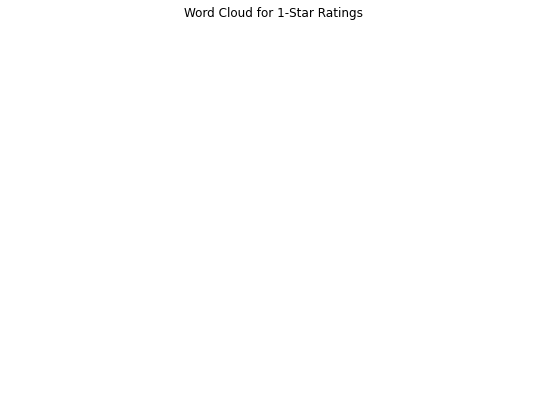

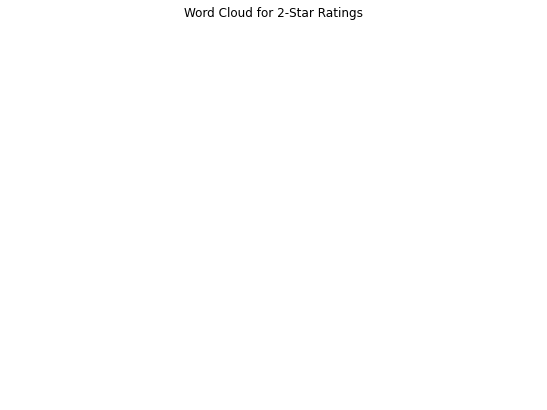

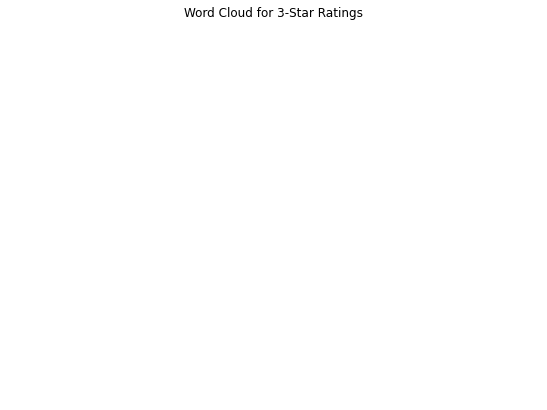

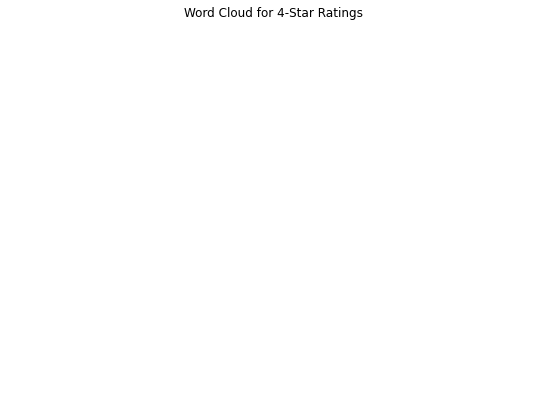

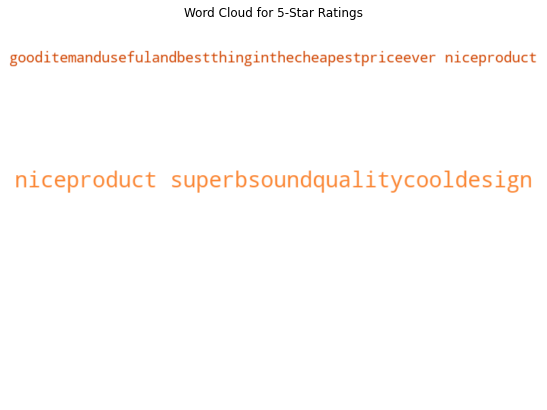

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=700,height=500, min_font_size=15, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["Stars"]==1]["Review"].values).lower()
two_star_text = " ".join(df[df["Stars"]==2]["Review"].values).lower()
three_star_text = " ".join(df[df["Stars"]==3]["Review"].values).lower()
four_star_text = " ".join(df[df["Stars"]==4]["Review"].values).lower()
five_star_text = " ".join(df[df["Stars"]==5]["Review"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()

In [24]:
df['Review']= df['Review'].str.lower()


# Machine Learning

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#tf_vec =TfidfVectorizer()
tf_vec= TfidfVectorizer(max_features=2000,ngram_range=(1,3), analyzer='char')
naive =MultinomialNB()

features = tf_vec.fit_transform(df['Review'])
X= features
y= df['sentiment']


I am going to use ‘CountVectorizer’ from the scikit-learn library. CountVectorizer develops a vector of all the words in the string. Import CountVectorizer and fit both our training, testing data into it.

# Underrepresentation vs. Overrepresentation

Performing over-representation is possible by bootstrapping the minority classes to match the size of the majority classes. This can be done using K-Nearest Neighbors (KNN) or via Support Vector Machine (SVM) by clustering a given class first before generating random samples within the decision boundaries of the class. A popular module called SMOTE, or Synthetic Minority Over-sampling Technique, does exactly this. However, since the imbalance in our classes is massive, and because we have 100 dimensions for each one of our almost 1.7 million observations, this approach is extremely computationally expensive.



In [26]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1, y1 = SM.fit_resample(X, y)

In [27]:
y1.value_counts()

0    15877
1    15877
Name: sentiment, dtype: int64

We need to split the dataset so that there is a training set and a test set.
The ‘train_test_split’ function from the scikit-learn library is helpful. The model will be trained using the training dataset and the performance of the model can be tested using the test dataset.

# Train-Test Split

The y is our target variable or the labels for the data. The X constitutes the features and are the predictor variables.

We evenly split the training and testing sets and stratify to ensure the ratio of classes in both sets are identical.

In [28]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=42)
naive.fit(x1_train,y1_train)
y1_pred = naive.predict(x1_test)

print('final score =>', accuracy_score(y1_test,y1_pred))

final score => 0.9930721753369443


Here is the output for the test data. As you remember, we used 1 for good reviews and 0 for a bad review.
Use the accuracy_score function to get the accuracy_score of the test data. So, it will compare the predicted ‘sentiment’ with the original ‘sentiment’ data to calculate the percentage of accuracy.

# Cross-Validation

Cross-validation makes the most of the training data by splitting the training set into folds and further subjecting each fold to train-test splits. Cross-validation can thus test against overfitting and the resulting scores can better reflect how the model performs on data it has not seen before

In [29]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)
    model.fit(x1_train, y1_train)
    print("Accuracy is", model.score(x1_test, y1_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x1, y1, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [30]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 100.0
Cross validation is 100.0


# DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 100.0
Cross validation is 98.9985313243497


# Random Forest

In [32]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 95.86849729185036
Cross validation is 95.39890376244301


In [33]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3917
           1       1.00      0.99      0.99      4022

    accuracy                           0.99      7939
   macro avg       0.99      0.99      0.99      7939
weighted avg       0.99      0.99      0.99      7939



# confusion_matrix

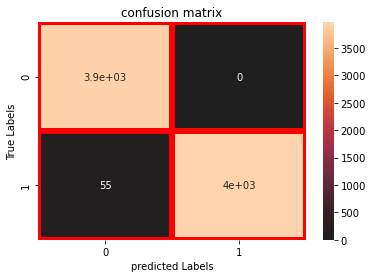

In [34]:
cof_mat = confusion_matrix(y1_test,y1_pred)

ax = plt.subplot()
sns.heatmap(cof_mat,annot=True,ax=ax, linewidths=5,linecolor='r',center=0)
ax.set_xlabel('predicted Labels'); ax.set_ylabel('True Labels')
ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels([0,1])
ax.yaxis.set_ticklabels([0,1])
plt.show()

# Conclusion


Beyond word use and word frequency, our model actually extracts and quantifies context. Every token in all the reviews are understood by their neighboring words and embedded in a given number of dimensions. All the interactions of a word with all the other words it has been associated with are expressed in vectors. And all the words in a given review are averaged according to each of the dimensions to create its 100 features. So the essence of a review by its words make up the final dataframe.

What we have is a multi-class model where each of the five classes correspond to a review’s star rating. This is then a discrete approach where each class is independent of each other. In a situation where a 5-star rating is misinterpreted by the model as a 1-star review, then the model has simply misclassified – it is agnostic to how far off 1 and 5 are. This is in contrast with a continuous approach whereas a misclassification of a 5-star review as a 1-star review would be more penalizing. Our model then is reliant on the distinction of each kind of review. It is more concerned in asking "What makes a 5-star review different from a 4-star review?" than asking "Is this review more approving than criticizing?"

# Limitations and Recommendations

Though we have observed satisfactory results in our model compared to the baseline, there are several limitations in the way the model handles data. These could serve as areas of improvement. First, despite a rich vocabulary, the model will not be able to handle words that it has not encountered during training. In fact, if an unknown word appears in a review, the word is dropped from the dimension-averaging step since has not been referenced in our word

Because each word is simplified by lemmatization during pre-processing, then alternate forms of a token shouldn’t necessarily be a concern. However, the model cannot identify if a word is misspelled and will identify one simply as a new word. Incorporating a spellchecker would add to the computational cost and will certainly add to the model’s complexity.

Finally, as is usually the case in NLP, sarcasm or text that is intended to be ironic is interpreted by what is literally in the text and not by its underlying context. Because sarcasm is usually detected by readers through the mood and sentiment of the document, it takes adding another layer of NLP just to approximate whether the review is sarcastic or not in order to properly work with such text. This supplement layer will not only utilize tagged sarcastic text as supervised labels, but must also consider the review’s given product rating in its judgment to detect sarcasm.